In [5]:
!pip install langdetect

     |████████████████████████████████| 983kB 5.3MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=6aa43963e5ad9bc58e7f20e45b4debd3148a229b937d5d569e5cae09c6d3d579
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [6]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
# Authentication
consumerKey = ''
consumerSecret =''
accessToken = ''
accessTokenSecret = ''
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
SentimentIntensityAnalyzer().polarity_scores('quite good')

{'compound': 0.4927, 'neg': 0.0, 'neu': 0.238, 'pos': 0.762}

In [13]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
#tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
tweets = api.search(q=keyword, count = noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
 elif pos > neg:
     positive_list.append(tweet.text)
     positive += 1
 
 elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: covid india
Please enter how many tweets to analyze: 100


In [14]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  100
positive number:  34
negative number:  20
neutral number:  46


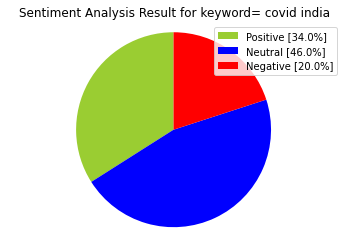

In [15]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()

In [16]:
tweet_list

,0
0,RT @MalayPrasoon333: OFB (Ordnance Factory Boa...
1,RT @UNICEF: As COVID-19 cases rise exponential...
2,RT @journalistreyaz: Along with busting Covid-...
3,Excessive use of the world’s most potent antib...
4,.@BharatBiotech has applied to the @WHO to get...
...,...
95,RT @indiacares_2020: Around 60 expert doctors ...
96,Christ the King Vineyard missionaries Muthu an...
97,RT @soniafaleiro: An incredibly moving online ...
98,RT @vizhpuneet: देश में हर महीने बन रही 8.5 कर...


In [17]:
tweet_list.drop_duplicates(inplace = True)

In [18]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @MalayPrasoon333: OFB (Ordnance Factory Boa...,ofb ordnance factory board and dpsus defenc...
1,RT @UNICEF: As COVID-19 cases rise exponential...,as covid 19 cases rise exponentially in india ...
2,RT @journalistreyaz: Along with busting Covid-...,along with busting covid 19 myths and fake new...
3,Excessive use of the world’s most potent antib...,excessive use of the world s most potent antib...
4,.@BharatBiotech has applied to the @WHO to get...,has applied to the to get its emergency u...
5,either to advise the Election Commission or th...,either to advise the election commission or th...
6,@hale_razor 4000 deaths/wk from COViD .... Ind...,razor 4000 deaths wk from covid india
7,RT @AdvMamtaSharma: Judiciary is the most powe...,judiciary is the most powerful organ of govt ...
8,RT @zuln09: https://t.co/JsVCRzFyEe,
9,RT @priyankac19: धंधा ना हो मंदा। \nजब सरकार क...,...
